#### Load Important Librarier

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
#plt.style.use('fivethirtyeight')

#### Reading the Population and Death Data

In [147]:
data = pd.read_excel("death_population_final_combined.xlsx")
data.head(10)

,year,country,total_deaths,no_injured,total_damage_000_usd,total_damage_adjusted_000_usd,country_code,population
0,2001,Afghanistan,485.0,20.0,10.0,17.0,AFG,19688632.0
1,2002,Afghanistan,4083.0,1391.0,0.0,0.0,AFG,21000256.0
2,2003,Afghanistan,137.0,4.0,0.0,0.0,AFG,22645130.0
3,2004,Afghanistan,18.0,40.0,0.0,0.0,AFG,23553551.0
4,2005,Afghanistan,570.0,44.0,5050.0,7568.0,AFG,24411191.0
5,2006,Afghanistan,382.0,185.0,0.0,0.0,AFG,25442944.0
6,2007,Afghanistan,296.0,20.0,0.0,0.0,AFG,25903301.0
7,2008,Afghanistan,1334.0,182.0,0.0,0.0,AFG,26427199.0
8,2009,Afghanistan,101.0,86.0,20000.0,27282.0,AFG,27385307.0
9,2010,Afghanistan,350.0,200.0,0.0,0.0,AFG,28189672.0


In [148]:
data['country'].unique()

array(['Afghanistan', 'Niger', 'Indonesia', 'Peru', 'France', 'India',
       'Somalia', 'Brazil', 'China', 'Colombia', 'Sri Lanka', 'Pakistan',
       'Italy', 'Canada', 'Nigeria', 'Japan', 'Bangladesh', 'Nepal',
       'Kenya', 'United States', 'Australia', 'Vietnam', 'Argentina',
       'Haiti', 'Algeria', 'Philippines', 'Congo, Dem. Rep.', 'Guatemala',
       'Mozambique', 'Iran, Islamic Rep.', 'Mexico', 'Romania',
       'Thailand', 'Sudan', 'Turkiye', 'Albania', 'Tajikistan',
       'Honduras', 'Madagascar', 'Bolivia', 'Spain', 'South Africa',
       'Panama', 'Tanzania', 'Russian Federation', 'Uganda', 'Germany',
       'Angola', 'Dominican Republic', 'Korea, Rep.', 'Malaysia',
       'Malawi', 'Poland', 'Ethiopia', 'Greece', 'Chile', 'Myanmar',
       'New Zealand', 'Costa Rica', 'Papua New Guinea', 'Cambodia',
       'Guinea', 'Mali', 'Nicaragua', 'Paraguay', 'Rwanda', 'Switzerland',
       'United Kingdom', 'Yemen, Rep.', 'Zambia', 'Zimbabwe', 'Burundi',
       'Cuba', 'Ghana

In [149]:
# Filter the data for a specific country
selected_country = 'Malaysia'
country = data[data['country'] == selected_country]
print(country.isnull().sum())
country['total_deaths'].fillna(0, inplace=True)
print(country.isnull().sum())


# Calculate the mortality rate
country['mortality_rate'] = (country['total_deaths'] / country['population']) * 1e6
country.tail()

year                             0
country                          0
total_deaths                     2
no_injured                       2
total_damage_000_usd             2
total_damage_adjusted_000_usd    2
country_code                     0
population                       0
dtype: int64
year                             0
country                          0
total_deaths                     0
no_injured                       2
total_damage_000_usd             2
total_damage_adjusted_000_usd    2
country_code                     0
population                       0
dtype: int64


,year,country,total_deaths,no_injured,total_damage_000_usd,total_damage_adjusted_000_usd,country_code,population,mortality_rate
1168,2019,Malaysia,2.0,0.0,0.0,0.0,MYS,32804020.0,0.060968
1169,2020,Malaysia,0.0,0.0,6800.0,7689.0,MYS,33199993.0,0.000000
1170,2021,Malaysia,79.0,3.0,1460000.0,1576841.0,MYS,33573874.0,2.353020
1171,2022,Malaysia,50.0,0.0,240.0,240.0,MYS,33938221.0,1.473265
1172,2023,Malaysia,4.0,0.0,0.0,0.0,MYS,34308525.0,0.116589


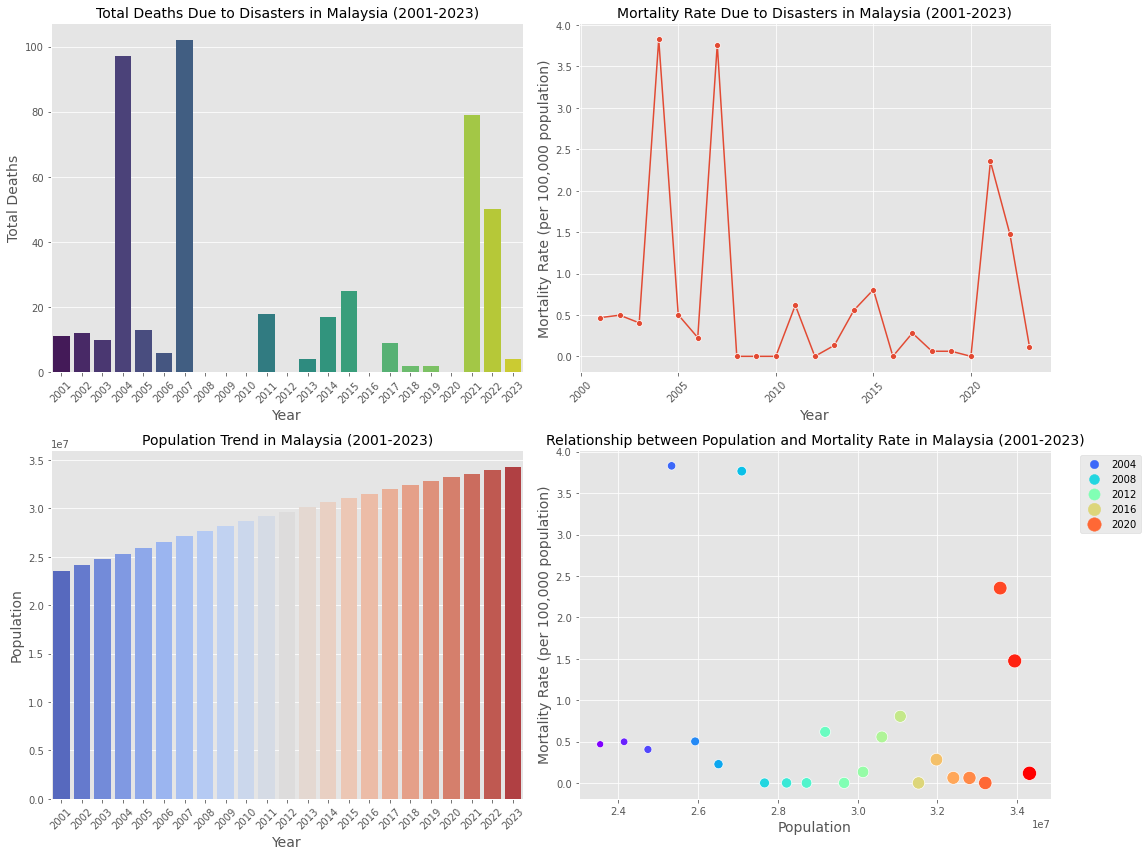

In [150]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# 1. Bar plot to visualize total deaths each year
sns.barplot(data=country, x='year', y='total_deaths', palette='viridis', ax=axs[0, 0])
axs[0, 0].set_title(f'Total Deaths Due to Disasters in {selected_country} (2001-2023)', fontsize = 14)
axs[0, 0].set_xlabel('Year', fontsize = 14)
axs[0, 0].set_ylabel('Total Deaths', fontsize = 14)
axs[0, 0].tick_params(axis='x', rotation=45)

# 2. Line plot for mortality rate over the years
sns.lineplot(data=country, x='year', y='mortality_rate', marker='o', ax=axs[0, 1])
axs[0, 1].set_title(f'Mortality Rate Due to Disasters in {selected_country} (2001-2023)', fontsize = 14)
axs[0, 1].set_xlabel('Year', fontsize = 14)
axs[0, 1].set_ylabel('Mortality Rate (per 100,000 population)', fontsize = 14)
axs[0, 1].tick_params(axis='x', rotation=45)

# 3. Bar plot to show the population trend over the years
sns.barplot(data=country, x='year', y='population', palette='coolwarm', ax=axs[1, 0])
axs[1, 0].set_title(f'Population Trend in {selected_country} (2001-2023)', fontsize = 14)
axs[1, 0].set_xlabel('Year', fontsize = 14)
axs[1, 0].set_ylabel('Population', fontsize = 14)
axs[1, 0].tick_params(axis='x', rotation=45)

# 4. Scatter plot to visualize the relationship between the population and the mortality rate
sns.scatterplot(data=country, x='population', y='mortality_rate', hue='year', palette='rainbow', size='year', sizes=(50, 200), ax=axs[1, 1])
axs[1, 1].set_title(f'Relationship between Population and Mortality Rate in {selected_country} (2001-2023)', fontsize = 14)
axs[1, 1].set_xlabel('Population', fontsize = 14)
axs[1, 1].set_ylabel('Mortality Rate (per 100,000 population)', fontsize = 14)
axs[1, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout
plt.tight_layout()
plt.show()


In [151]:
# Data preparation for Prophet
#pip install prophet-1.1.5-py3-none-win_amd64.whl
from prophet import Prophet
prophet_data = country[['year', 'mortality_rate']]
prophet_data.columns = ['ds', 'y']

# Convert year into proper datetime format
prophet_data['ds'] = pd.to_datetime(prophet_data['ds'].astype(str) + '-12-31')

In [152]:
# Define disasters as holidays
disasters = pd.DataFrame({
    'holiday': 'disaster',
    'ds': pd.to_datetime(['2004-12-31','2007-12-31','2021-12-31','2022-12-31']),
    'lower_window': 0,
    'upper_window': 0,
})

# Initialize the Prophet model with additional parameters
model = Prophet(
    interval_width=0.95,
    growth='linear',
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    holidays=disasters,
    seasonality_mode='multiplicative',
    #seasonality_mode='additive',
    #changepoint_prior_scale=0.24,
    seasonality_prior_scale=250,
    #holidays_prior_scale=200,
    mcmc_samples=0
)

model.fit(prophet_data)

# Forecasting for 2023 to 2030
future_dates = model.make_future_dataframe(periods=7, freq='Y')
forecast = model.predict(future_dates)

17:07:52 - cmdstanpy - INFO - Chain [1] start processing
17:07:52 - cmdstanpy - INFO - Chain [1] done processing


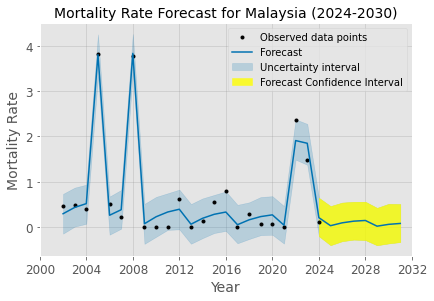

In [153]:
# Plot the forecast
fig = model.plot(forecast, figsize=(6, 4), uncertainty=True)

# Highlight the prediction (2024-2030) with a different color for the confidence interval
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], 
                 where=(forecast['ds'] >= '2023-12-31'), color='yellow', alpha=0.8, label='Forecast Confidence Interval')

# Customize the plot
ax = fig.gca()
ax.tick_params(axis='both', labelsize=12)  # Adjust labelsize as needed
ax.set_xlabel('Year', fontsize=14)  # Set the X-axis label
ax.set_ylabel('Mortality Rate', fontsize=14)  # Set the Y-axis label
ax.set_title(f'Mortality Rate Forecast for {selected_country} (2024-2030)', fontsize=14)  # Set the title
ax.set_xlim(pd.to_datetime('2000'), pd.to_datetime('2032'))  # Set the X-axis limits

# Add legend
leg = ax.legend()
for line in leg.get_lines():
    line.set_linewidth(1.5)  # Set the linewidth of the legend lines
plt.show()
# Save the figure
fig.savefig(f'mortality_rate_forecast_{selected_country}.pdf', format='pdf', bbox_inches='tight')
fig.savefig(f'mortality_rate_forecast_{selected_country}.png', format='png', dpi=300, bbox_inches='tight')

In [154]:
# Print the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7))

           ds      yhat  yhat_lower  yhat_upper
23 2024-12-31  0.034300   -0.394732    0.465389
24 2025-12-31  0.097297   -0.307034    0.542630
25 2026-12-31  0.134208   -0.271758    0.560886
26 2027-12-31  0.149307   -0.281817    0.561828
27 2028-12-31  0.023446   -0.396458    0.426362
28 2029-12-31  0.063864   -0.355847    0.515194
29 2030-12-31  0.083761   -0.325464    0.510740


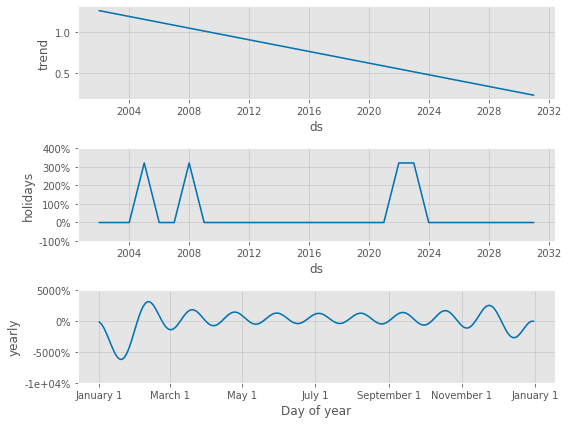

In [155]:
# Displaying components of the forecast
fig2 = model.plot_components(forecast, figsize=(8, 6))

In [156]:
# Adjust the last 7 'yhat_lower' entries to zero if they are negative and calculate the means for those entries
forecast.loc[forecast.index[-7:], 'yhat_lower'] = forecast['yhat_lower'][-7:].apply(lambda x: max(x, 0))

# Now calculate the mean of the 'yhat_lower' and 'yhat_upper' for the last 7 entries
mean_lower_last_7 = forecast['yhat_lower'][-7:].mean()
mean_upper_last_7 = forecast['yhat_upper'][-7:].mean()

mean_lower_last_7, mean_upper_last_7

(0.0, 0.5118612164792087)

In [157]:
forecast['yhat'][-7:]

23    0.034300
24    0.097297
25    0.134208
26    0.149307
27    0.023446
28    0.063864
29    0.083761
Name: yhat, dtype: float64

#### BenchMark Strategy 1

In [158]:
# Calculate historical mean
historical_mean = country['mortality_rate'].mean()
print(f"Historical Mean Mortality Rate: {historical_mean}")

# Selecting only the years 2024 to 2030 for the calculation
forecast_data = forecast[(forecast['ds'] >= "2024-12-31") & (forecast['ds'] <= "2030-12-31")]

# Calculate forecast mean
forecast_mean = forecast_data['yhat'].mean()
print(f"Forecast Mean Mortality Rate: {forecast_mean}")

# Check for reduction
reduction_25 = historical_mean * 0.75
reduction_50 = historical_mean * 0.50

print(f"25% Reduction Threshold: {reduction_25}")
print(f"50% Reduction Threshold: {reduction_50}")

# Check for 25% Reduction
if forecast_mean <= reduction_25:
    print("Yes:25% reduction")
else:
    print("No: 25% reduction")

# Check for 50% Reduction
if forecast_mean <= reduction_50:
    print("Yes:50% reduction")
else:
    print("No: 50% reduction")

Historical Mean Mortality Rate: 0.7020342075436392
Forecast Mean Mortality Rate: 0.08374043905407778
25% Reduction Threshold: 0.5265256556577294
50% Reduction Threshold: 0.3510171037718196
Yes:25% reduction
Yes:50% reduction


#### BenchMark Strategy 2

To set a benchmark for a significant decrease in the mortality rate, we can calculate the average year-on-year change in the mortality rate for the past data. This average change will serve as our benchmark. If the average (or median) year-on-year change in the forecasted data is lower than the benchmark, it indicates a significant decrease in mortality rates compared to historical trends.

Here's how we can calculate this benchmark:

- Calculating Year-on-Year Changes (Historical Data): For the historical data, the year-on-year change in mortality rate is calculated by subtracting the mortality rate of the previous year from that of the current year.These changes provide insight into how the mortality rate has evolved annually.

- Set the Benchmark: Calculate the average of these year-on-year change. Use this average change as the benchmark for a significant decrease.

- Calculating Year-on-Year Changes (Forecasted Data): Similar to the historical data, the year-on-year change in the forecasted mortality rate is calculated.

- Comparison with Benchmark: The average (or median) of these forecasted year-on-year changes is then compared with the benchmark. If the average (or median) year-on-year change in the forecasted data is lower than the benchmark, it indicates a significant decrease in mortality rates compared to historical trends.

In [159]:
# Calculate year-on-year decrease in mortality rate
country['year_on_year_change'] = country['mortality_rate'].diff()

# Compute the average decrease (ignoring the first year as it has no previous year data)
benchmark = country['year_on_year_change'][1:].mean()
print(benchmark)

-0.015938666446387365


In [160]:
# Calculate the year-on-year decrease in forecasted mortality rate
forecast_data['year_on_year_change'] = forecast_data['yhat'].diff()

# Display the results
forecast_data[['ds', 'yhat', 'year_on_year_change']]

,ds,yhat,year_on_year_change
23,2024-12-31,0.034300,NaN
24,2025-12-31,0.097297,0.062997
25,2026-12-31,0.134208,0.036911
26,2027-12-31,0.149307,0.015099
27,2028-12-31,0.023446,-0.125861
28,2029-12-31,0.063864,0.040418
29,2030-12-31,0.083761,0.019897


In [161]:
# Calculate the average decrease across all forecasted years
# Ignoring the first entry as it does not have a preceding year for comparison
average_forecast = forecast_data['year_on_year_change'][1:].mean()
print(average_forecast)

0.008243407720948212
